<a href="https://colab.research.google.com/github/jardimguilherme/MO911A/blob/master/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting up environment

In [132]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# bp.csv

## Data Cleaning

Reading bp.csv and building dataframe

In [133]:
bp = pd.read_csv("bp.csv")
dfbp = pd.DataFrame(bp)

dfbp

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No
...,...,...
195,58,No
196,68,Yes
197,70,No
198,58,No


Clustering information

In [134]:
yes = dfbp.query("type == 'Yes'")
no = dfbp.query("type == 'No'")

yes = list(yes['bp'])
no = list(no['bp'])

print("diabetic:", yes)
print("non-diabetic:", no)

diabetic: [70, 76, 78, 40, 60, 62, 94, 68, 84, 65, 66, 80, 90, 72, 76, 78, 106, 84, 80, 70, 66, 84, 74, 68, 88, 82, 62, 78, 70, 70, 78, 82, 84, 62, 82, 70, 66, 76, 82, 60, 80, 70, 82, 68, 92, 74, 90, 60, 78, 66, 82, 88, 70, 76, 78, 90, 60, 68, 78, 85, 74, 60, 78, 62, 102, 48, 68, 62]
non-diabetic: [68, 82, 76, 60, 58, 50, 80, 78, 66, 76, 60, 62, 70, 66, 86, 64, 68, 58, 72, 74, 60, 66, 64, 82, 80, 48, 86, 66, 68, 60, 64, 68, 60, 74, 76, 74, 66, 66, 70, 88, 74, 38, 48, 64, 76, 62, 60, 54, 94, 70, 58, 68, 78, 64, 72, 76, 68, 76, 64, 60, 75, 78, 54, 72, 76, 76, 50, 82, 80, 62, 72, 64, 74, 74, 110, 72, 78, 84, 74, 56, 72, 70, 86, 52, 56, 80, 95, 66, 58, 68, 80, 72, 68, 70, 88, 70, 62, 70, 78, 56, 80, 55, 74, 64, 82, 74, 54, 82, 60, 52, 58, 72, 90, 68, 72, 70, 62, 90, 80, 74, 54, 85, 66, 70, 52, 64, 84, 68, 74, 58, 70, 58]


## Histograms

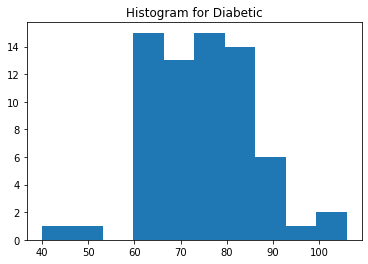

In [135]:
plt.hist(yes, bins='auto')
plt.title("Histogram for Diabetic")
plt.show()

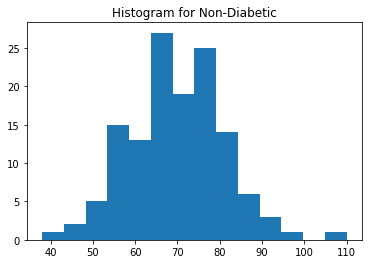

In [136]:
plt.hist(no, bins='auto')
plt.title("Histogram for Non-Diabetic")
plt.show()

## Mean and Median

Mean and Median for Diabetic

In [137]:
print("mean:", np.mean(yes))
print("median:", np.median(yes))

mean: 74.58823529411765
median: 76.0


Mean and Median for Non-Diabetic

In [138]:
print("mean:", np.mean(no))
print("median:", np.median(no))

mean: 69.54545454545455
median: 70.0


## T-Test and Wilcoxon Rank Sum

t-test on samples

In [139]:
stats.ttest_ind(yes,no)

Ttest_indResult(statistic=3.001495202122035, pvalue=0.0030323591864622732)

wilcoxon rank sum test on samples

In [140]:
stat, p = stats.ranksums(yes,no)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=3.046, p=0.002
Probably different distributions


# paired.csv

## Data Cleaning

In [141]:
paired = pd.read_csv("paired.csv")
dfpaired = pd.DataFrame(paired)

dfpaired

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5
5,Unal,8.3,15.5
6,Columbia_River,18.3,12.7
7,Fritzi_Pauley,13.3,11.1
8,Trichobel,7.9,19.9
9,Gaver,8.1,20.4


Clustering information

In [142]:
august = list(dfpaired['August'])
november = list(dfpaired['November'])

print("August:", august)
print("November:", november)

August: [8.1, 10.0, 16.5, 13.6, 9.5, 8.3, 18.3, 13.3, 7.9, 8.1, 8.9, 12.6, 13.4]
November: [11.2, 16.3, 15.3, 15.6, 10.5, 15.5, 12.7, 11.1, 19.9, 20.4, 14.2, 12.7, 36.8]


## Histograms

Histogram for august

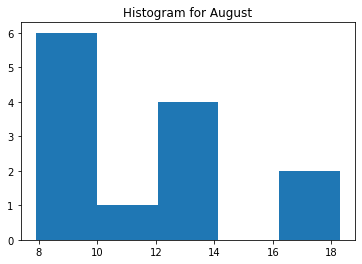

In [143]:
plt.hist(august, bins='auto')
plt.title("Histogram for August")
plt.show()

Histogram for November

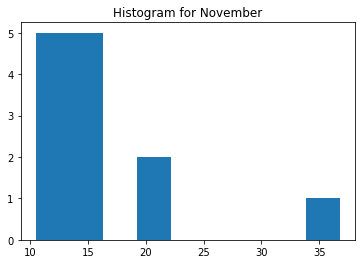

In [144]:
plt.hist(november, bins='auto')
plt.title("Histogram for November")
plt.show()

## Mean and Median

Mean and Median for August

In [145]:
print("mean:", np.mean(august))
print("median:", np.median(august))

mean: 11.423076923076925
median: 10.0


Mean and Median for November

In [146]:
print("mean:", np.mean(november))
print("median:", np.median(november))

mean: 16.323076923076922
median: 15.3


## Paired T-Test and Wilcoxon Signed Rank

Paired T-Test

In [147]:
stats.ttest_rel(august, november)

Ttest_relResult(statistic=-2.3088956550760438, pvalue=0.03955525086687241)

Wilcoxon Signed Rank

In [148]:
stat, p = stats.wilcoxon(august,november)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=16.000, p=0.040
Probably different distributions


# Confidence Interval

In [149]:
yes = (yes,)
no = (no,)

**Diabetic**

In [150]:
bootstrap_ci = stats.bootstrap(yes, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=71.77941176470588, high=77.29411764705883)


**Non-Diabetic**

In [151]:
bootstrap_ci = stats.bootstrap(no, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=67.6590909090909, high=71.47727272727273)


**Cohen D with Pooled Standard Deviation**

In [152]:
yes = dfbp.query("type == 'Yes'")
no = dfbp.query("type == 'No'")

yes = list(yes['bp'])
no = list(no['bp'])

In [153]:
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s
 
# seed random number generator
np.random.seed(1)

# calculate cohen's d
d = cohend(yes, no)
print('Cohens d: %.3f' % d)

Cohens d: 0.448
